In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_new = pd.read_csv('INNHotelsGroup_newdata.csv')
data_new

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1,Not Canceled
1,INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2,Not Canceled
2,INNHG_128129,43,Online,1,126.90,2,1,2022-07-01,1,2,Not Canceled
3,INNHG_128130,145,Offline,0,72.76,2,0,2022-07-01,0,1,Not Canceled
4,INNHG_128131,86,Offline,1,107.69,2,1,2022-07-01,0,2,Not Canceled
...,...,...,...,...,...,...,...,...,...,...,...
3578,INNHG_131705,258,Online,1,106.20,2,0,2022-09-29,0,1,Canceled
3579,INNHG_131706,263,Online,0,100.30,2,2,2022-09-29,0,4,Canceled
3580,INNHG_131707,185,Online,2,116.10,2,2,2022-09-29,0,3,Canceled
3581,INNHG_131708,214,Online,0,120.90,2,0,2022-09-29,0,3,Canceled


In [3]:
data_past = pd.read_csv('INNHotelsGroup_pastdata.csv')
data_past

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No
...,...,...,...,...,...,...,...,...,...,...,...,...
27088,INNHG_128122,113,Offline,0,85.00,2,1,2022-06-30,0,3,Canceled,Yes
27089,INNHG_128123,11,Online,1,139.00,2,0,2022-06-30,0,3,Canceled,No
27090,INNHG_128124,35,Online,0,117.90,2,0,2022-06-30,0,3,Canceled,No
27091,INNHG_128125,68,Online,1,131.40,2,0,2022-06-30,0,2,Canceled,No


In [4]:
print('new:',data_new.shape)
print('past:',data_past.shape)

new: (3583, 11)
past: (27093, 12)


In [5]:
print(data_new.columns.to_list())
print()
print(data_past.columns.to_list())

['booking_id', 'lead_time', 'market_segment_type', 'no_of_special_requests', 'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights', 'arrival_date', 'required_car_parking_space', 'no_of_week_nights', 'booking_status']

['booking_id', 'lead_time', 'market_segment_type', 'no_of_special_requests', 'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights', 'arrival_date', 'required_car_parking_space', 'no_of_week_nights', 'booking_status', 'rebooked']


# Descriptive Analysis

### past_data

In [6]:
print(data_past.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27093 entries, 0 to 27092
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  27093 non-null  object 
 1   lead_time                   27093 non-null  int64  
 2   market_segment_type         27093 non-null  object 
 3   no_of_special_requests      27093 non-null  int64  
 4   avg_price_per_room          27093 non-null  float64
 5   no_of_adults                27093 non-null  int64  
 6   no_of_weekend_nights        27093 non-null  int64  
 7   arrival_date                27093 non-null  object 
 8   required_car_parking_space  27093 non-null  int64  
 9   no_of_week_nights           27093 non-null  int64  
 10  booking_status              27093 non-null  object 
 11  rebooked                    8857 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.5+ MB
None


In [7]:
data_past.describe().T

# By looking at this summary, 
# we can suspect outliers on the upper tail of lead time, avg price per room and no.of week nights

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.0,81.605249,84.901428,0.0,14.0,55.0,118.0,443.0
no_of_special_requests,27093.0,0.556454,0.743715,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,27093.0,101.025910,34.557289,0.0,79.0,97.0,119.0,540.0
no_of_adults,27093.0,1.825822,0.512182,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,27093.0,0.778319,0.861787,0.0,0.0,1.0,1.0,6.0
required_car_parking_space,27093.0,0.028864,0.167426,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,27093.0,2.171373,1.386023,0.0,1.0,2.0,3.0,17.0


<Axes: >

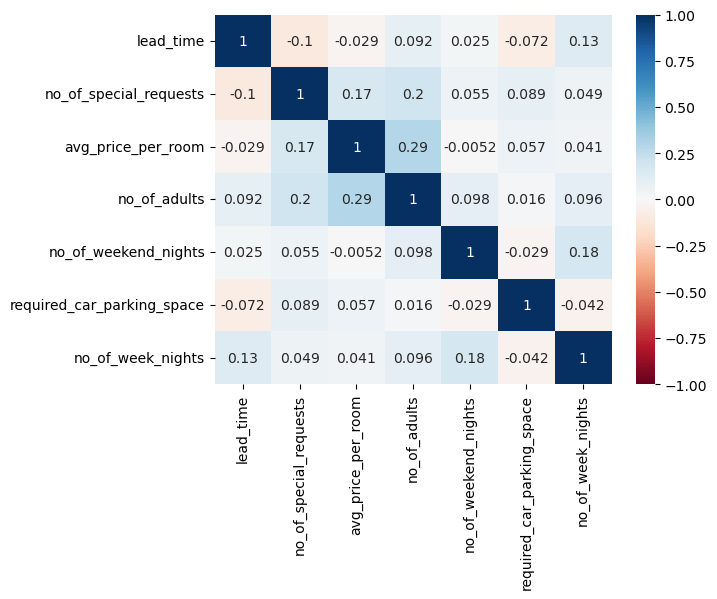

In [8]:
# Correlation

sns.heatmap(data_past.corr(),vmax=1,vmin=-1,annot=True,cmap='RdBu')

### Inference

#### Positive correlation

* There is some positive correlation between avg room price and no of adults --> 0.29
* There is some weak positive correlation between no of special request and no of adults --> 0.2
* There is some weak positive correlation between no of week nights and weekend nights --> 0.18
* There is some weak positive correlation between avg room price and no of special request --> 0.17

#### Negative correlation

* There is no significant negative correlation

# Data Visualization and Data Preprocessing

In [9]:
# Can you tell what % of cancelled booking were rebooked?

rebooked = data_past[data_past['booking_status']=='Canceled']['rebooked']
rebooked.value_counts()

No     7092
Yes    1765
Name: rebooked, dtype: int64

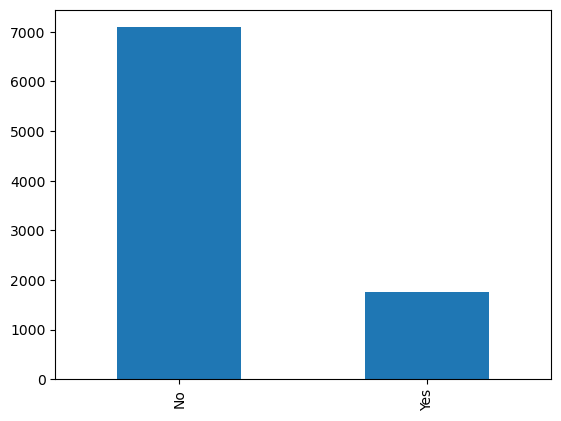

In [10]:
rebooked.value_counts().plot(kind="bar")
plt.show()

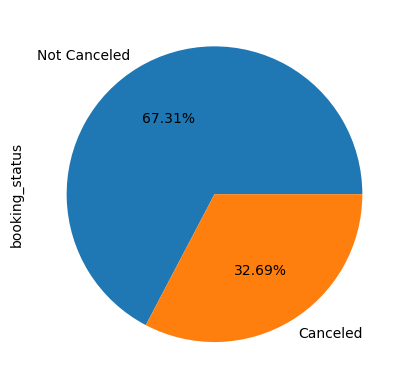

In [11]:
data_past['booking_status'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

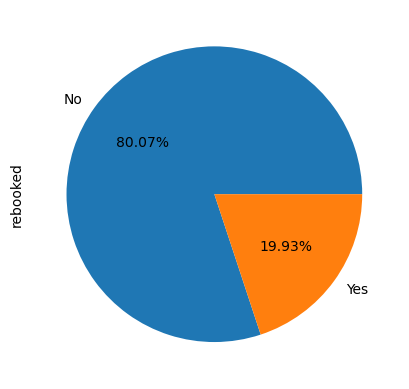

In [12]:
rebooked.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

### Inference

* There were 33% bookings which are cancelled at the last minute. Out of those 80% of the canceled bookings were not rebooked. That is the main reason why company is incurring losses

In [13]:
# Now we do not need the rebooked column in our analysis, hence we can drop it

data_past.drop(columns='rebooked',inplace=True)

* Rebooking will occur only after the cancellation of data
* The prediction that is required is to check whether the room booking is done or canceled

### new_data

In [14]:
print(data_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  3583 non-null   object 
 1   lead_time                   3583 non-null   int64  
 2   market_segment_type         3583 non-null   object 
 3   no_of_special_requests      3583 non-null   int64  
 4   avg_price_per_room          3583 non-null   float64
 5   no_of_adults                3583 non-null   int64  
 6   no_of_weekend_nights        3583 non-null   int64  
 7   arrival_date                3583 non-null   object 
 8   required_car_parking_space  3583 non-null   int64  
 9   no_of_week_nights           3583 non-null   int64  
 10  booking_status              3583 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 308.0+ KB
None


In [15]:
data_new.describe()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights
count,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000
mean,92.921295,0.837845,121.608049,1.998046,0.967904,0.057494,2.306726
std,73.538050,0.836892,36.899246,0.530738,0.908934,0.232816,1.575382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,96.050000,2.000000,0.000000,0.000000,1.000000
50%,81.000000,1.000000,118.650000,2.000000,1.000000,0.000000,2.000000
75%,146.000000,1.000000,143.000000,2.000000,2.000000,0.000000,3.000000
max,346.000000,5.000000,300.000000,4.000000,7.000000,1.000000,17.000000


# Training & Testing and Concatenate

* Past data has to be used as training set and new data as test set
* For now we will store y_test in separate variable for doing validation later on
* We also need to combine train and test data over here in order to preprocess

In [16]:
y_test = data_new['booking_status']
data_new.drop(columns=['booking_status'],inplace=True)

In [17]:
data = pd.concat([data_past,data_new],axis=0)
data

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled
...,...,...,...,...,...,...,...,...,...,...,...
3578,INNHG_131705,258,Online,1,106.20,2,0,2022-09-29,0,1,NaN
3579,INNHG_131706,263,Online,0,100.30,2,2,2022-09-29,0,4,NaN
3580,INNHG_131707,185,Online,2,116.10,2,2,2022-09-29,0,3,NaN
3581,INNHG_131708,214,Online,0,120.90,2,0,2022-09-29,0,3,NaN


In [18]:
data.shape

(30676, 11)

# Checking null values

In [19]:
data.isnull().sum()

booking_id                       0
lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
arrival_date                     0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
dtype: int64

### Inference

* There is no null values other than booking status which account to test data

# Checking for duplicates

In [20]:
data.duplicated().sum()

0

### Inference

* There is no duplicate values

# Feature Engineering

The arrival date column is converted to date format and columns created for day, month and weekday

In [21]:
data['arrival_date'] = pd.to_datetime(data['arrival_date'],format='%Y-%m-%d')

In [22]:
data['arrival_day'] = data['arrival_date'].dt.day
data['arrival_month'] = data['arrival_date'].dt.month
data['arrival_weekday'] = data['arrival_date'].dt.weekday

# The data is of same year, year column is not required

In [23]:
data.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,1,1,4
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,1,1,4
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,1,1,4
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,1,1,4
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,1,1,4


In [24]:
data.drop(columns=['arrival_date'],inplace=True)

In [25]:
data.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,INNHG_101034,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,INNHG_101035,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4
2,INNHG_101036,24,Online,1,71.69,2,2,0,0,Not Canceled,1,1,4
3,INNHG_101037,23,Online,0,84.70,1,2,0,0,Not Canceled,1,1,4
4,INNHG_101038,46,Online,1,149.40,2,2,0,3,Canceled,1,1,4


# Visualization

In [26]:
data.columns

Index(['booking_id', 'lead_time', 'market_segment_type',
       'no_of_special_requests', 'avg_price_per_room', 'no_of_adults',
       'no_of_weekend_nights', 'required_car_parking_space',
       'no_of_week_nights', 'booking_status', 'arrival_day', 'arrival_month',
       'arrival_weekday'],
      dtype='object')

In [27]:
# The no of special requests column is a categorical column

data.no_of_special_requests.value_counts()

0    17111
1     9633
2     3410
3      470
4       45
5        7
Name: no_of_special_requests, dtype: int64

In [28]:
data.drop(columns='booking_id',inplace=True)

In [29]:
num_col = ['lead_time','avg_price_per_room','arrival_day']
cat_col = data.drop(columns=num_col).columns

# columns separated manually to avoid misrepresentation

# Univariate Analysis

## Numerical columns

1. Distplot
2. Boxplot

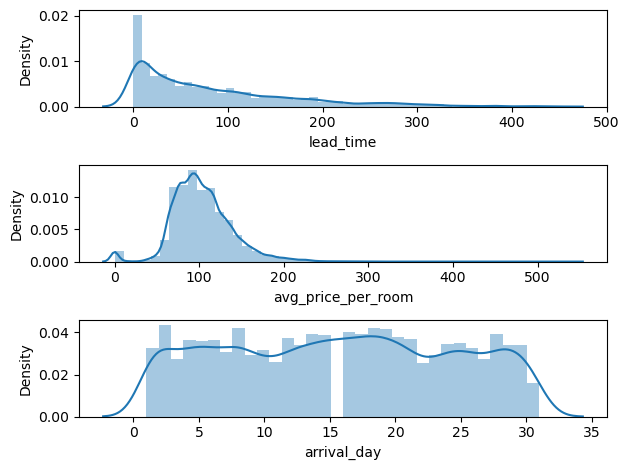

In [30]:
# Numeric columns
t=1
for i in num_col:
    plt.subplot(3,1,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

### Inference

* Lead time is highly right skewed
* Avg price is highly right skewed with 0 price in some entries
* Arrival day is almost uniform, but there is no data in the 15th day

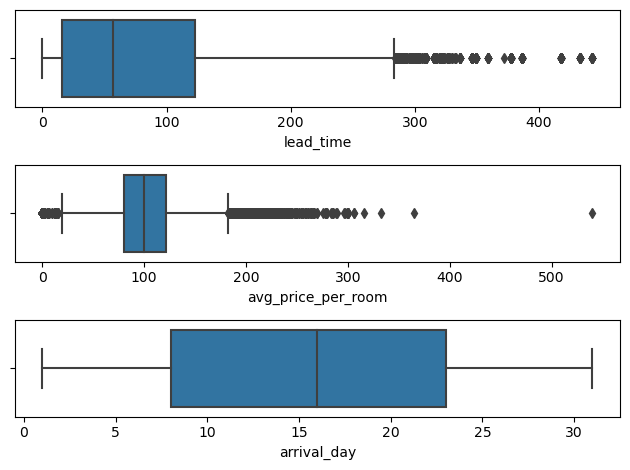

In [31]:
t=1
for i in num_col:
    plt.subplot(3,1,t)
    sns.boxplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

### Inference

* There are extreme outliers in lead time and avg room price and require outlier treatment

## Categorical Columns

1. Countplot

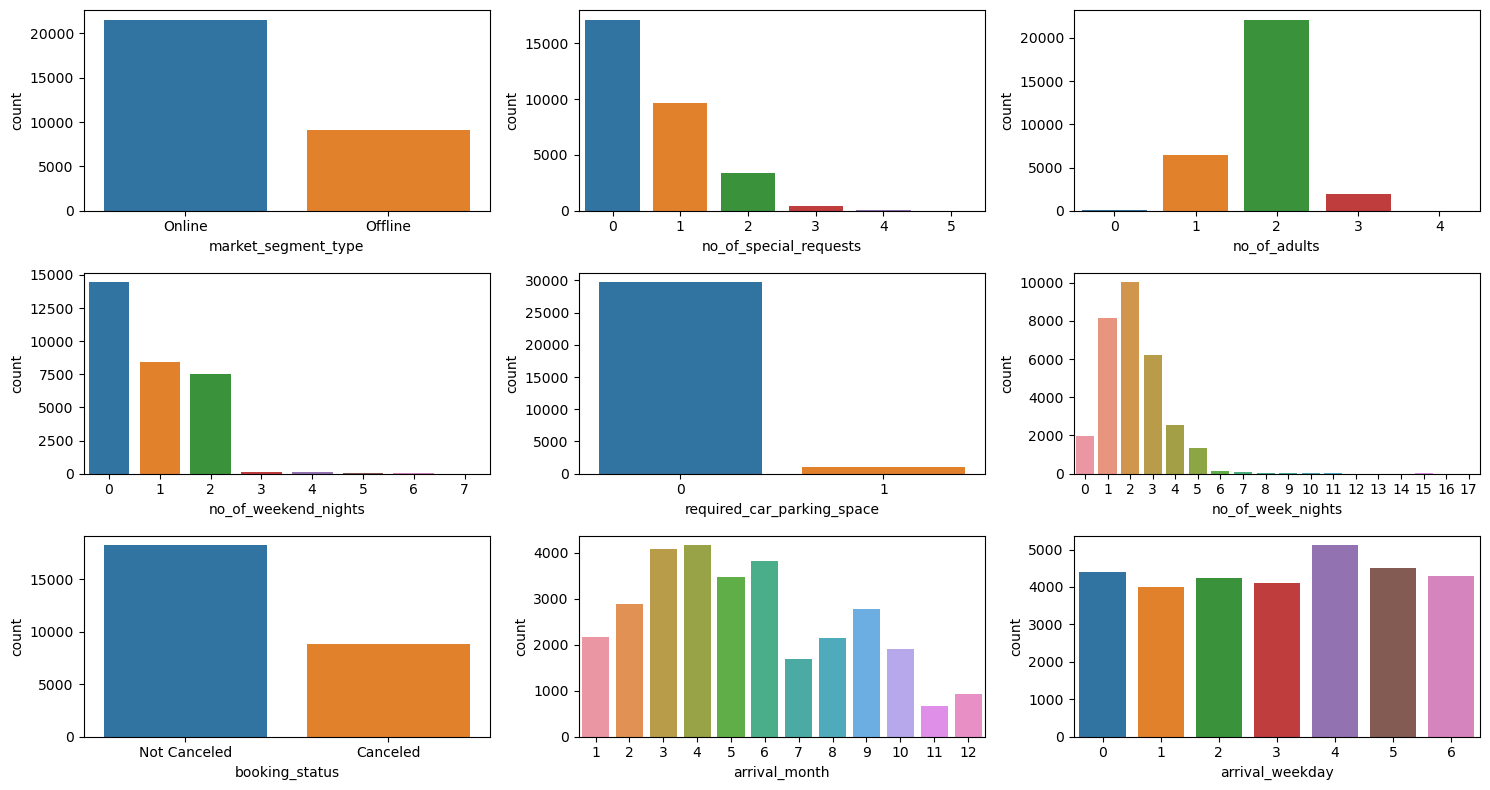

In [32]:
plt.figure(figsize=[15,8])
t =1
for i in cat_col:
    plt.subplot(3,3,t)
    sns.countplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

### Inference

* Most of the bookings are online
* Either there are no special requests of 1 special requests in data
* Most of the bookings have been made by couples
* Very few customers requested for car parking space
* Very few customers are having more than 5 weeknights in their stay
* Maximum Arrivals are in month March and April and arrival day is Friday.

# Bivariate Analysis

## Num vs Cat

1. Displot - kde with hue
2. Displot - hist with hue(optional) 

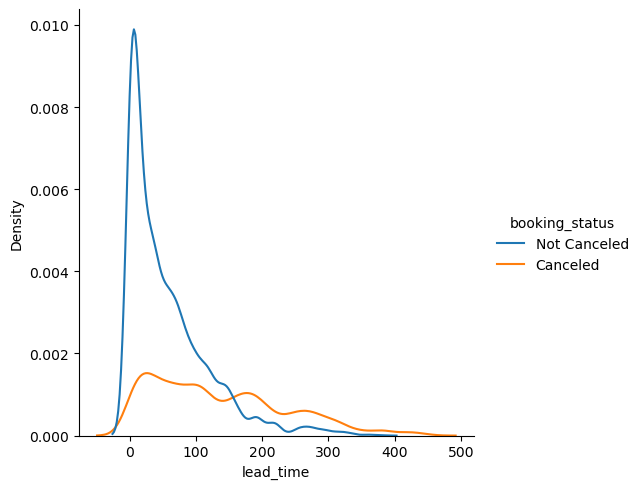

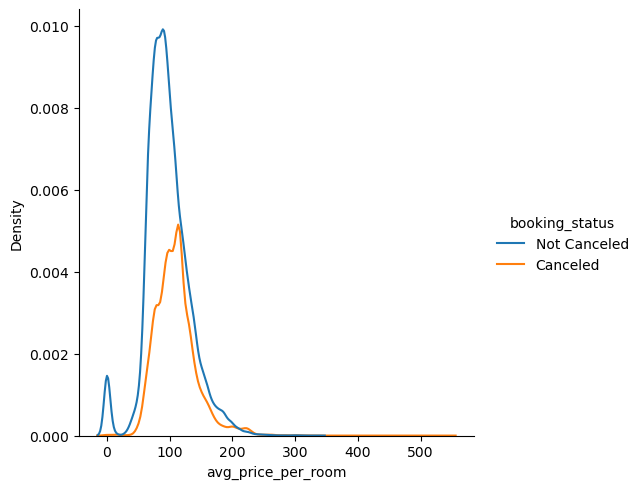

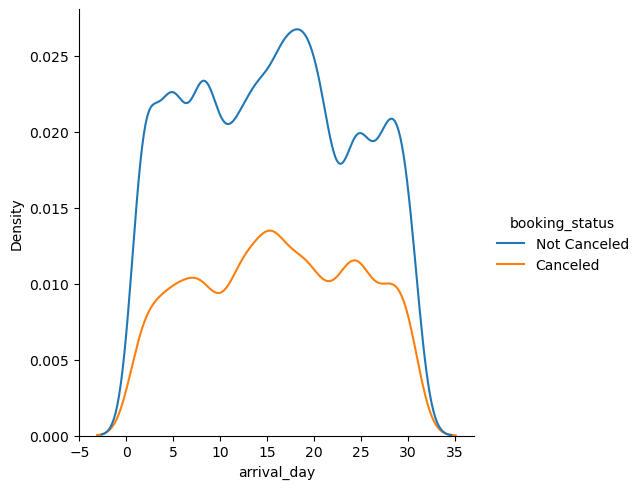

In [33]:
for i in num_col:
    sns.displot(data= data,x=i,hue=data['booking_status'],kind='kde')
    plt.show()

### Inference

* In lead time and average, for more extreme values the booking is cancelled (i.e) more than ~400 and more than ~350 respectively

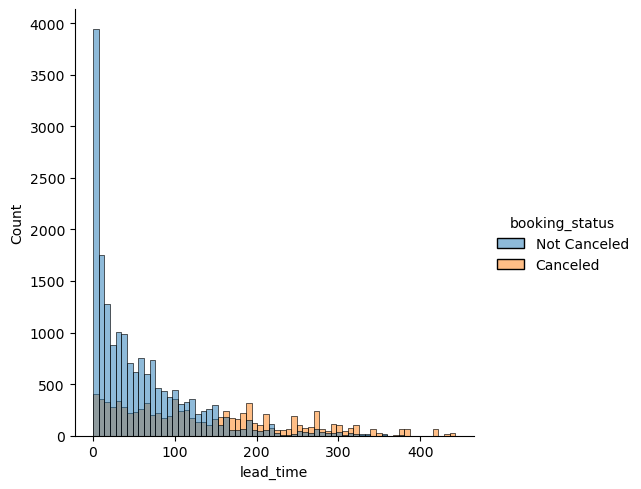

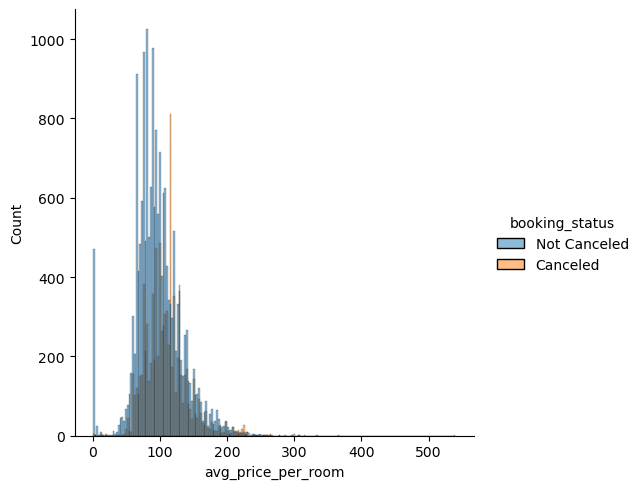

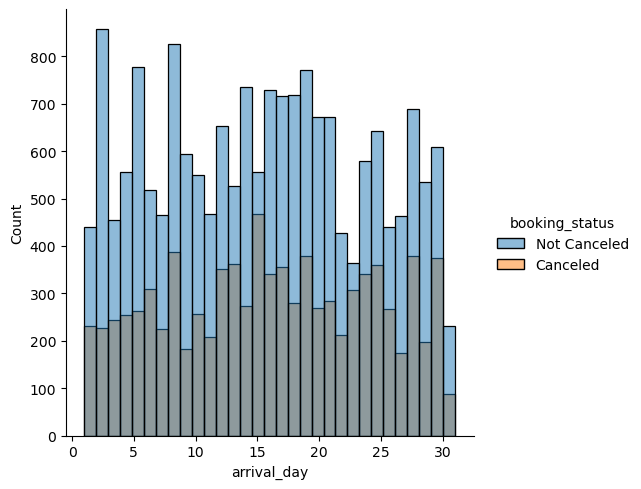

In [34]:
for i in num_col:
    sns.displot(data= data,x=i,hue=data['booking_status'],kind='hist')
    plt.show()

## Cat vs Cat

1. Countplot with hue

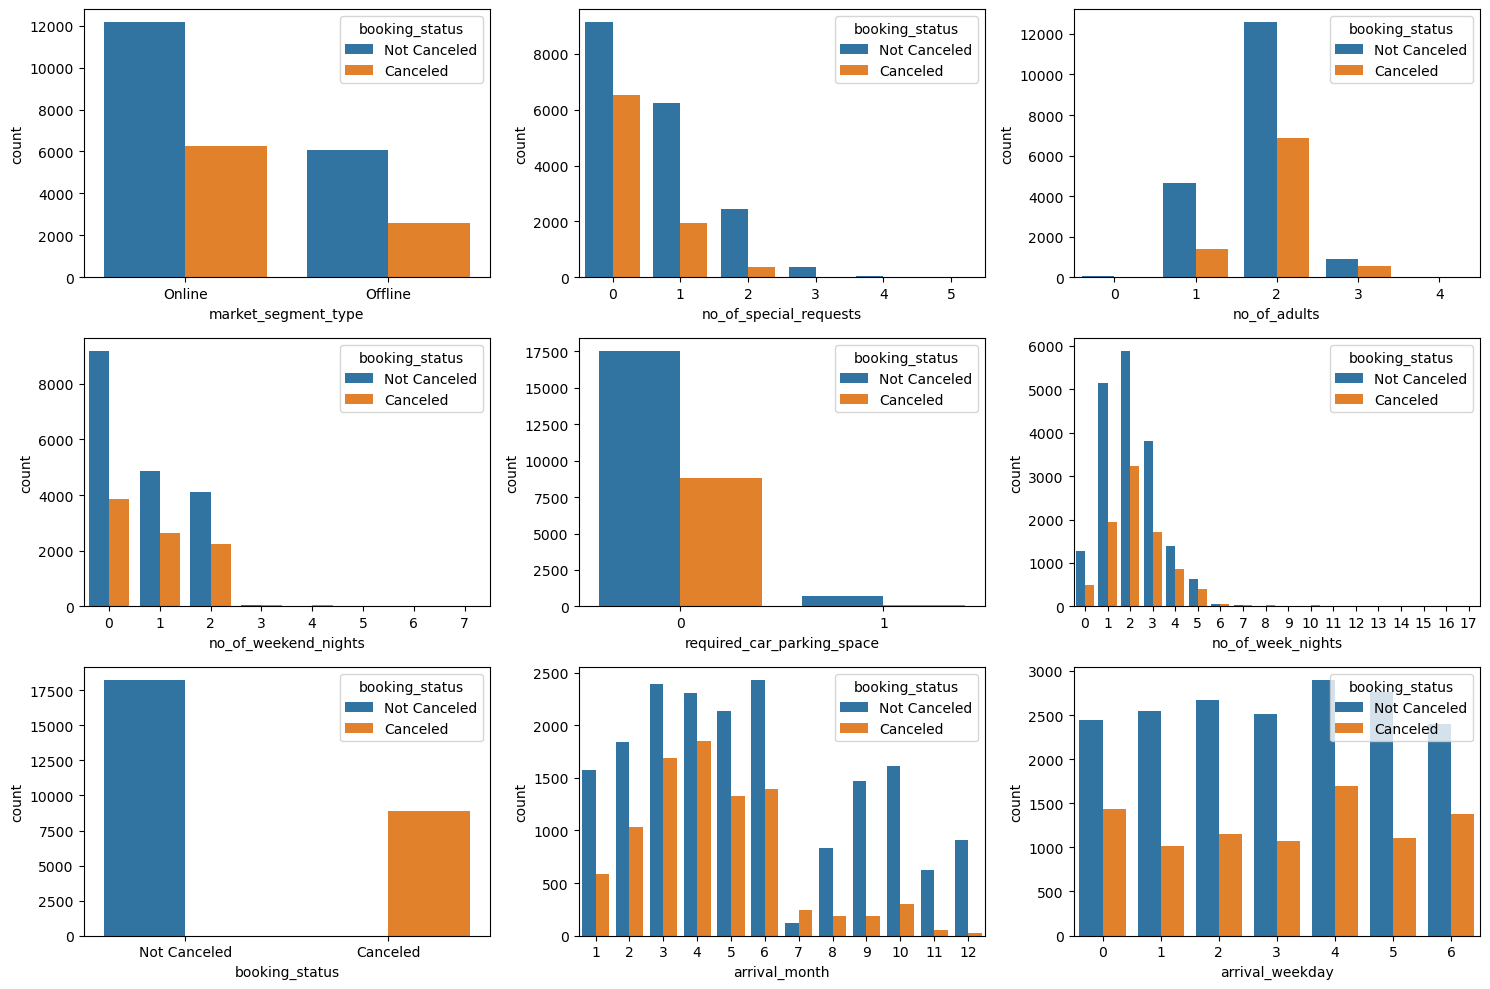

In [35]:
plt.figure(figsize=[15,10])
t =1
for i in cat_col:
    plt.subplot(3,3,t)
    sns.countplot(data=data,x=data[i],hue='booking_status')
    t+=1
plt.tight_layout()
plt.show()

# Feature Engineering

## Encoding

1. Market segment type
2. Booking status

In [36]:
data.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4


In [37]:
# Market segment type and target variable(booking status) is encoded using dummy encoding

In [38]:
# Online=1, Offline=0

data['market_segment_type'] = data['market_segment_type'].map({'Online':1,'Offline':0})

In [39]:
data['market_segment_type'].value_counts()

1    21561
0     9115
Name: market_segment_type, dtype: int64

In [40]:
# Canceled =1, Not canceled=0

data['booking_status'] = data['booking_status'].map({'Canceled':1,'Not Canceled':0})

In [41]:
data['booking_status'].value_counts()

0.0    18236
1.0     8857
Name: booking_status, dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30676 entries, 0 to 3582
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lead_time                   30676 non-null  int64  
 1   market_segment_type         30676 non-null  int64  
 2   no_of_special_requests      30676 non-null  int64  
 3   avg_price_per_room          30676 non-null  float64
 4   no_of_adults                30676 non-null  int64  
 5   no_of_weekend_nights        30676 non-null  int64  
 6   required_car_parking_space  30676 non-null  int64  
 7   no_of_week_nights           30676 non-null  int64  
 8   booking_status              27093 non-null  float64
 9   arrival_day                 30676 non-null  int64  
 10  arrival_month               30676 non-null  int64  
 11  arrival_weekday             30676 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 4.1 MB


In [43]:
data.shape

(30676, 12)

In [44]:
y_test = y_test.map({'Canceled':1,'Not Canceled':0})

In [45]:
# Missing value treatment
# Outlier treatment
# Duplicate treatment

# Missing value / null value treatment

# Train and test split

In [46]:
x_test = data[data['booking_status'].isnull()]

In [47]:
x_test.drop(columns=['booking_status'],inplace=True)

In [48]:
print(x_test.shape,y_test.shape)

(3583, 11) (3583,)


In [49]:
train = data[data['booking_status'].notnull()]

In [50]:
# Lets drop duplicates from train

train.drop_duplicates(inplace=True)

In [51]:
train.shape

(18655, 12)

In [52]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
3578    1
3579    1
3580    1
3581    1
3582    1
Name: booking_status, Length: 3583, dtype: int64

# Outlier treatment

We will treat outliers from train data only. As it might lead to data leakage(should not include test data for better model performance)

In [53]:
num_col

['lead_time', 'avg_price_per_room', 'arrival_day']

In [54]:
# Cap the extreme outliers

for i in ['lead_time', 'avg_price_per_room']:
    q3,q1 = np.quantile(train[i],[0.75,0.25])
    iqr = q3-q1
    ul,ll = q3+2.5*iqr,q1-2.5*iqr
    train[i] = np.where(train[i]>ul,ul,train[i])
    train[i] = np.where(train[i]<ll,ll,train[i])

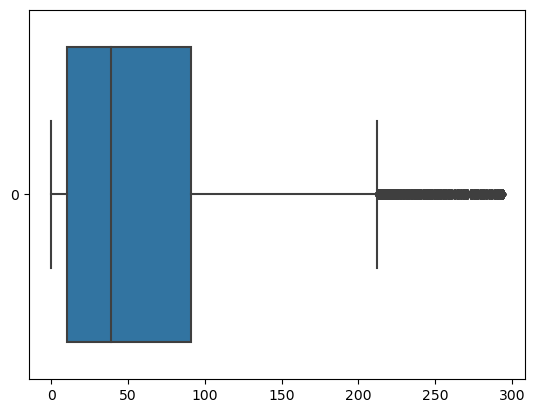

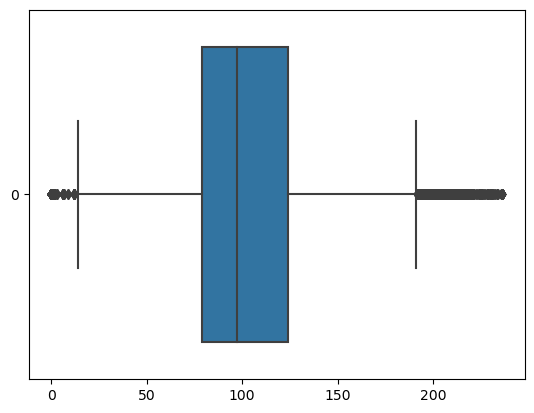

In [55]:
for i in ['lead_time', 'avg_price_per_room']:
    sns.boxplot(train[i],orient='h')
    plt.show()

In [56]:
x_train = train.drop(columns='booking_status')
y_train = train['booking_status']

In [57]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18655, 11) (3583, 11) (18655,) (3583,)


In [58]:
x_train.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_month,arrival_weekday
0,0.0,1,0,85.03,1,1,0,0,1,1,4
1,34.0,1,2,125.10,2,2,0,0,1,1,4


In [59]:
y_train.head(2)

0    0.0
1    0.0
Name: booking_status, dtype: float64

In [60]:
x_test.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_month,arrival_weekday
0,4,1,1,103.0,1,0,1,1,1,7,4
1,147,1,2,103.7,2,2,0,2,1,7,4


In [61]:
y_test.head(2)

0    0
1    0
Name: booking_status, dtype: int64

# Predictive Modelling

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV

In [63]:
mod = []
acc = []
pre = []
rec = []
f1 = []
ck = []

def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    hard = m.predict(xtest)
    soft = m.predict_proba(xtest)[:,1]
    
    print('classification report\n',classification_report(ytest,hard))
    fpr,tpr,th = roc_curve(ytest,soft)
    plt.title(f'ROC AUC: {round(roc_auc_score(ytest,soft),3)}')
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.show()
    
    inp = input('Save the model in scorecard:Y/N')
    if inp.lower()=='y':
        global scorecard
        mod.append(str(model))
        acc.append(accuracy_score(ytest,hard))
        pre.append(precision_score(ytest,hard))
        rec.append(recall_score(ytest,hard))
        f1.append(f1_score(ytest,hard))
        ck.append(cohen_kappa_score(ytest,hard))
        scorecard = pd.DataFrame({'Model':mod,
                                 'Accuracy':acc,
                                 'Precision':pre,
                                 'Recall':rec,
                                 'F1 Score':f1,
                                 'Cohen Kappa':ck})
    else:
        return

## Logistic Regression

classification report
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2383
           1       0.75      0.52      0.61      1200

    accuracy                           0.78      3583
   macro avg       0.77      0.72      0.73      3583
weighted avg       0.78      0.78      0.77      3583



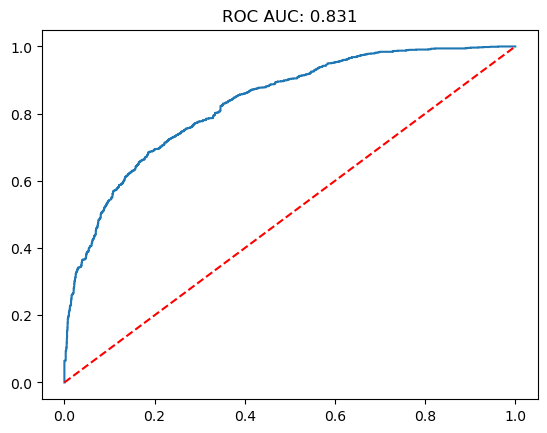

Save the model in scorecard:Y/Ny


In [64]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

In [65]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168


## Decision Tree

In [66]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'max_depth':[4,5,6,7,8]},
                   cv=5,scoring='f1')

In [67]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8]}, scoring='f1')

In [68]:
gscv.best_score_

0.5768423229754392

In [69]:
gscv.best_params_

{'max_depth': 7}

classification report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2383
           1       0.74      0.75      0.74      1200

    accuracy                           0.83      3583
   macro avg       0.81      0.81      0.81      3583
weighted avg       0.83      0.83      0.83      3583



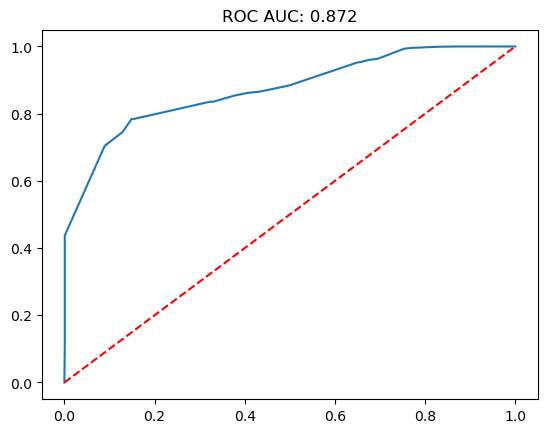

Save the model in scorecard:Y/Ny


In [70]:
model_validation(DecisionTreeClassifier(max_depth=5),x_train,y_train,x_test,y_test)

classification report
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      2383
           1       0.71      0.69      0.70      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.77      0.78      3583
weighted avg       0.80      0.80      0.80      3583



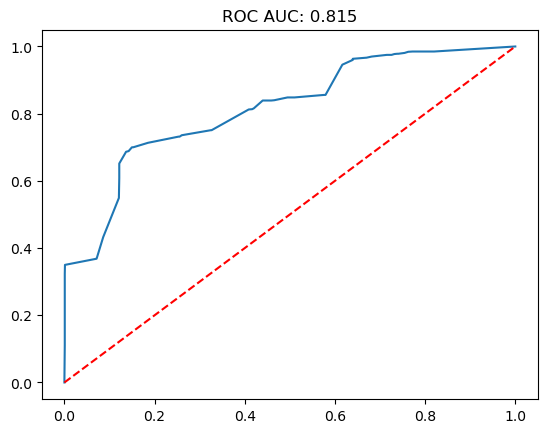

Save the model in scorecard:Y/Ny


In [71]:
model_validation(DecisionTreeClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

In [72]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=5),0.828914,0.743973,0.745833,0.744902,0.616202
2,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595


## Random Forest

classification report
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      2383
           1       0.88      0.59      0.71      1200

    accuracy                           0.84      3583
   macro avg       0.85      0.78      0.80      3583
weighted avg       0.84      0.84      0.83      3583



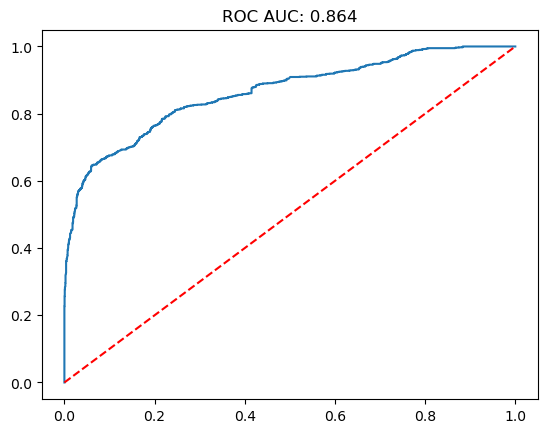

Save the model in scorecard:Y/Ny


In [73]:
model_validation(RandomForestClassifier(max_depth=5,n_estimators=100),x_train,y_train,x_test,y_test)

classification report
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      2383
           1       0.87      0.64      0.73      1200

    accuracy                           0.85      3583
   macro avg       0.85      0.79      0.81      3583
weighted avg       0.85      0.85      0.84      3583



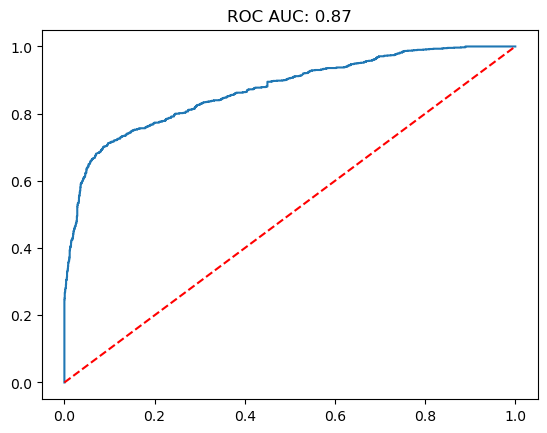

Save the model in scorecard:Y/Ny


In [74]:
model_validation(RandomForestClassifier(max_depth=7,n_estimators=100),x_train,y_train,x_test,y_test)

classification report
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      2383
           1       0.86      0.66      0.75      1200

    accuracy                           0.85      3583
   macro avg       0.86      0.81      0.82      3583
weighted avg       0.85      0.85      0.85      3583



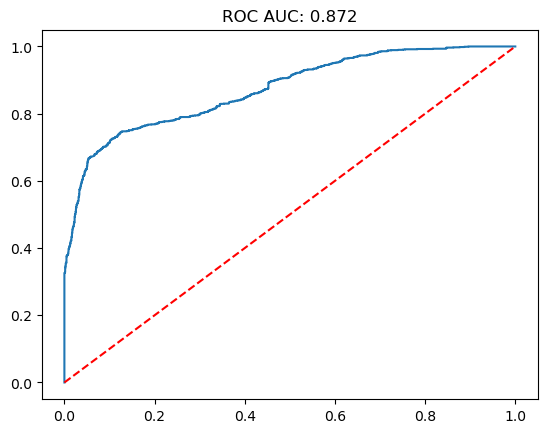

Save the model in scorecard:Y/Ny


In [75]:
model_validation(RandomForestClassifier(max_depth=8,n_estimators=100),x_train,y_train,x_test,y_test)

In [76]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=5),0.828914,0.743973,0.745833,0.744902,0.616202
2,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
3,RandomForestClassifier(max_depth=5),0.836171,0.880745,0.590833,0.707232,0.599533
4,RandomForestClassifier(max_depth=7),0.845660,0.865537,0.638333,0.734772,0.629406
5,RandomForestClassifier(max_depth=8),0.852079,0.862554,0.664167,0.750471,0.647859


## Adaptive Boost

classification report
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      2383
           1       0.72      0.63      0.67      1200

    accuracy                           0.80      3583
   macro avg       0.77      0.75      0.76      3583
weighted avg       0.79      0.80      0.79      3583



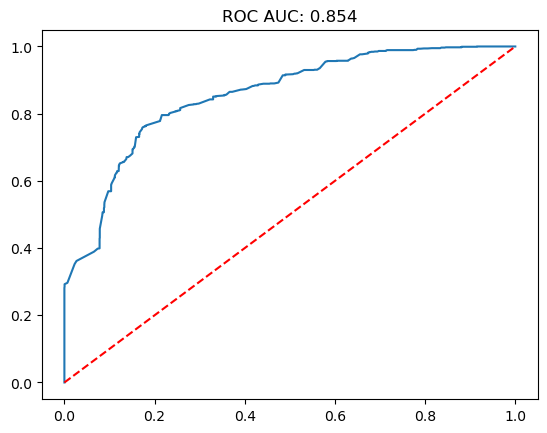

Save the model in scorecard:Y/Ny


In [77]:
model_validation(AdaBoostClassifier(n_estimators=100,learning_rate=0.1),x_train,y_train,x_test,y_test)

classification report
               precision    recall  f1-score   support

           0       0.88      0.68      0.77      2383
           1       0.57      0.82      0.67      1200

    accuracy                           0.73      3583
   macro avg       0.72      0.75      0.72      3583
weighted avg       0.78      0.73      0.74      3583



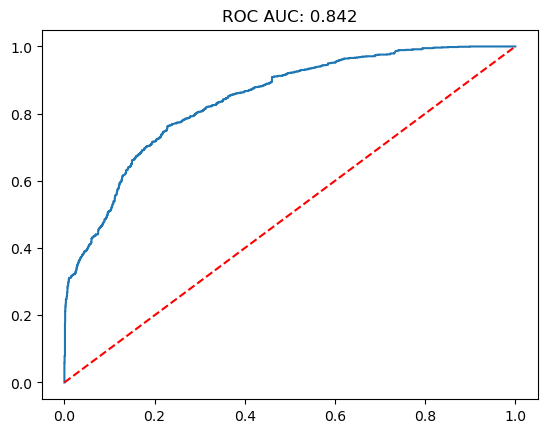

Save the model in scorecard:Y/Ny


In [78]:
model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=1),x_train,y_train,x_test,y_test)

classification report
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      2383
           1       0.61      0.79      0.69      1200

    accuracy                           0.76      3583
   macro avg       0.74      0.77      0.75      3583
weighted avg       0.79      0.76      0.77      3583



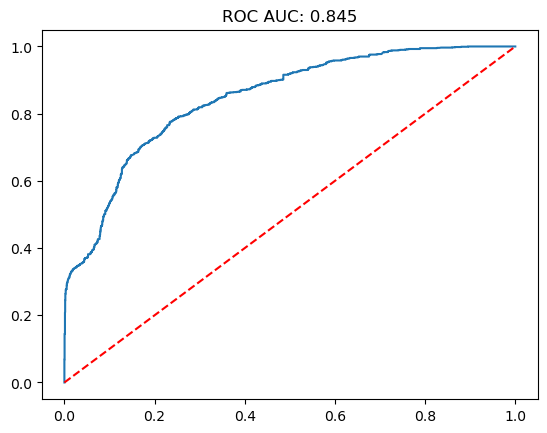

Save the model in scorecard:Y/Ny


In [79]:
model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=0.5),x_train,y_train,x_test,y_test)

In [80]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=5),0.828914,0.743973,0.745833,0.744902,0.616202
2,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
3,RandomForestClassifier(max_depth=5),0.836171,0.880745,0.590833,0.707232,0.599533
4,RandomForestClassifier(max_depth=7),0.845660,0.865537,0.638333,0.734772,0.629406
5,RandomForestClassifier(max_depth=8),0.852079,0.862554,0.664167,0.750471,0.647859
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795702,0.724568,0.629167,0.673506,0.525918
7,"AdaBoostClassifier(learning_rate=1, n_estimato...",0.728440,0.565192,0.820000,0.669160,0.451777
8,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.759699,0.608584,0.791667,0.688156,0.498075


## Gradient Boosting

classification report
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      2383
           1       0.64      0.77      0.70      1200

    accuracy                           0.78      3583
   macro avg       0.75      0.78      0.76      3583
weighted avg       0.79      0.78      0.78      3583



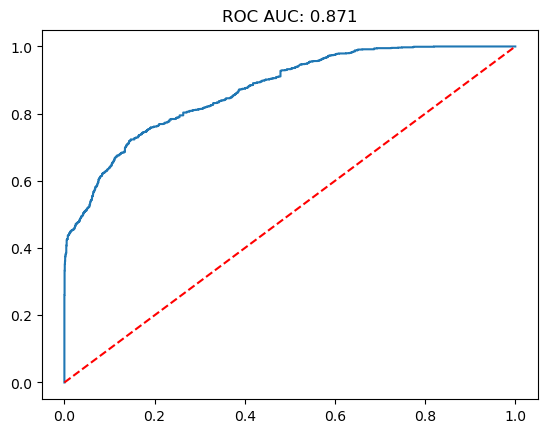

Save the model in scorecard:Y/Ny


In [81]:
model_validation(GradientBoostingClassifier(max_depth=5),x_train,y_train,x_test,y_test)

classification report
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      2383
           1       0.64      0.71      0.67      1200

    accuracy                           0.77      3583
   macro avg       0.74      0.75      0.75      3583
weighted avg       0.78      0.77      0.77      3583



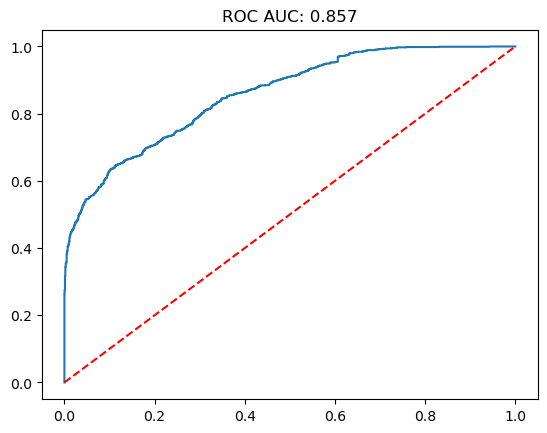

Save the model in scorecard:Y/Ny


In [82]:
model_validation(GradientBoostingClassifier(max_depth=9),x_train,y_train,x_test,y_test)

classification report
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      2383
           1       0.64      0.76      0.69      1200

    accuracy                           0.78      3583
   macro avg       0.75      0.77      0.76      3583
weighted avg       0.79      0.78      0.78      3583



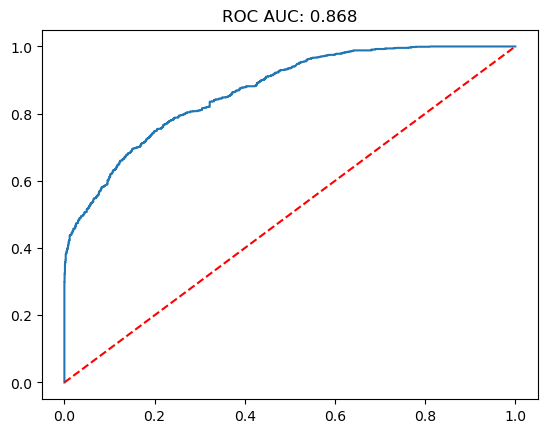

Save the model in scorecard:Y/Ny


In [83]:
model_validation(GradientBoostingClassifier(max_depth=6),x_train,y_train,x_test,y_test)

In [84]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=5),0.828914,0.743973,0.745833,0.744902,0.616202
2,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
3,RandomForestClassifier(max_depth=5),0.836171,0.880745,0.590833,0.707232,0.599533
4,RandomForestClassifier(max_depth=7),0.845660,0.865537,0.638333,0.734772,0.629406
5,RandomForestClassifier(max_depth=8),0.852079,0.862554,0.664167,0.750471,0.647859
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795702,0.724568,0.629167,0.673506,0.525918
7,"AdaBoostClassifier(learning_rate=1, n_estimato...",0.728440,0.565192,0.820000,0.669160,0.451777
8,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.759699,0.608584,0.791667,0.688156,0.498075
9,GradientBoostingClassifier(max_depth=5),0.777282,0.639197,0.769167,0.698185,0.524084


## XG Boost

classification report
               precision    recall  f1-score   support

           0       0.87      0.73      0.80      2383
           1       0.60      0.78      0.68      1200

    accuracy                           0.75      3583
   macro avg       0.73      0.76      0.74      3583
weighted avg       0.78      0.75      0.76      3583



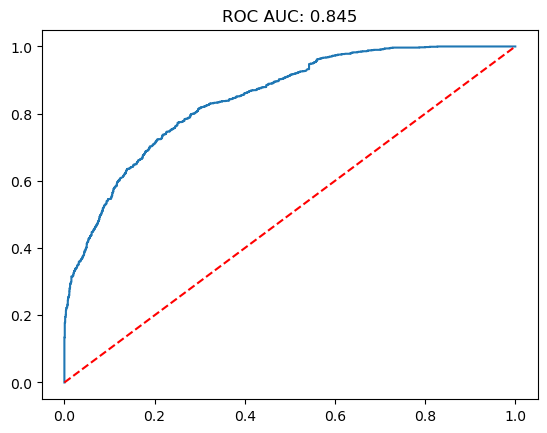

Save the model in scorecard:Y/Ny


In [85]:
model_validation(XGBClassifier(n_estimators=120,max_depth=7),x_train,y_train,x_test,y_test)

classification report
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      2383
           1       0.61      0.80      0.69      1200

    accuracy                           0.76      3583
   macro avg       0.74      0.77      0.75      3583
weighted avg       0.79      0.76      0.77      3583



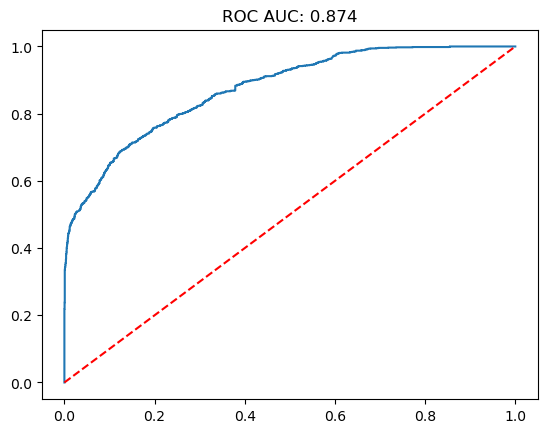

Save the model in scorecard:Y/Ny


In [86]:
model_validation(XGBClassifier(n_estimators=120,max_depth=4),x_train,y_train,x_test,y_test)

In [87]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=5),0.828914,0.743973,0.745833,0.744902,0.616202
2,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
3,RandomForestClassifier(max_depth=5),0.836171,0.880745,0.590833,0.707232,0.599533
4,RandomForestClassifier(max_depth=7),0.845660,0.865537,0.638333,0.734772,0.629406
5,RandomForestClassifier(max_depth=8),0.852079,0.862554,0.664167,0.750471,0.647859
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795702,0.724568,0.629167,0.673506,0.525918
7,"AdaBoostClassifier(learning_rate=1, n_estimato...",0.728440,0.565192,0.820000,0.669160,0.451777
8,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.759699,0.608584,0.791667,0.688156,0.498075
9,GradientBoostingClassifier(max_depth=5),0.777282,0.639197,0.769167,0.698185,0.524084


## Voting

In [88]:
base_learners = [('DT_4',DecisionTreeClassifier(max_depth=4)),
                ('DT_6',DecisionTreeClassifier(max_depth=6)),
                ('RF',RandomForestClassifier(n_estimators=120,max_depth=5)),
                ('XGB',XGBClassifier(n_estimators=100,max_depth=4))]

classification report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2383
           1       0.75      0.69      0.72      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.79      0.79      3583
weighted avg       0.82      0.82      0.82      3583



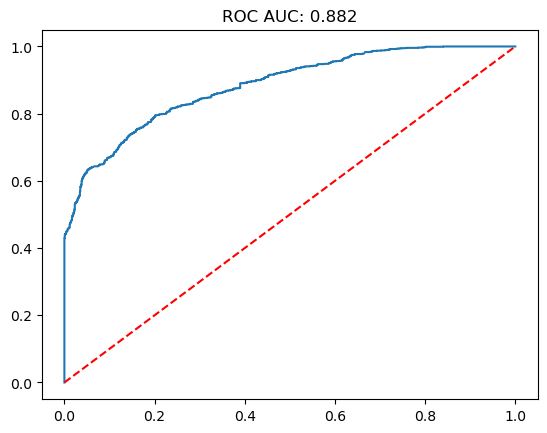

Save the model in scorecard:Y/Ny


In [89]:
model_validation(VotingClassifier(estimators=base_learners,voting='soft'),x_train,y_train,x_test,y_test)

## Stacking

1. Meta model --> Final model
2. Base model --> prediction of base model become input to meta model --> (e.g) RF+DT+XGB

classification report
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      2383
           1       0.83      0.53      0.65      1200

    accuracy                           0.81      3583
   macro avg       0.82      0.74      0.76      3583
weighted avg       0.81      0.81      0.80      3583



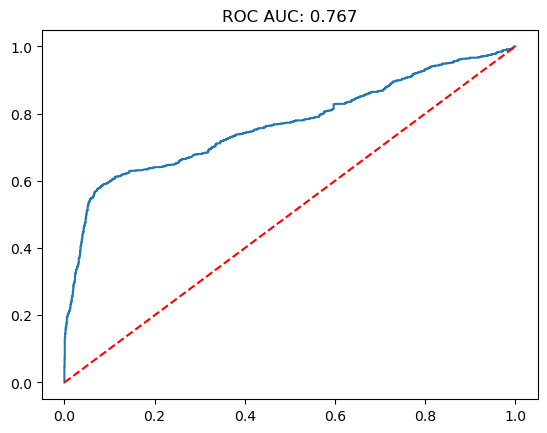

Save the model in scorecard:Y/Ny


In [90]:
model_validation(StackingClassifier(estimators=base_learners),x_train,y_train,x_test,y_test)

In [91]:
# Final scorecard

scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=5),0.828914,0.743973,0.745833,0.744902,0.616202
2,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
3,RandomForestClassifier(max_depth=5),0.836171,0.880745,0.590833,0.707232,0.599533
4,RandomForestClassifier(max_depth=7),0.845660,0.865537,0.638333,0.734772,0.629406
5,RandomForestClassifier(max_depth=8),0.852079,0.862554,0.664167,0.750471,0.647859
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795702,0.724568,0.629167,0.673506,0.525918
7,"AdaBoostClassifier(learning_rate=1, n_estimato...",0.728440,0.565192,0.820000,0.669160,0.451777
8,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.759699,0.608584,0.791667,0.688156,0.498075
9,GradientBoostingClassifier(max_depth=5),0.777282,0.639197,0.769167,0.698185,0.524084


Let's go with GBM and tune it for final prediction

In [92]:
param = {'n_estimators':[70,100,120,150],
         'learning_rate':[1,0.5,0.1],
         'max_depth':[3,4,5,6,7,8]}

In [93]:
gscv = GridSearchCV(estimator=XGBClassifier(),param_grid=param,
                   scoring='f1',verbose=1)

In [94]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [1, 0.5, 0.1],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [70, 100, 120, 150]},
             scoring='f1', verbose=1)

In [95]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 70}

classification report
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      2383
           1       0.73      0.75      0.74      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.80      0.80      3583
weighted avg       0.82      0.82      0.82      3583



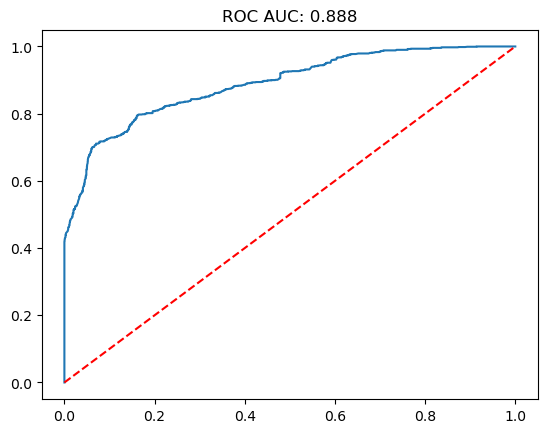

Save the model in scorecard:Y/Ny


In [96]:
model_validation(XGBClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

In [97]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=5),0.828914,0.743973,0.745833,0.744902,0.616202
2,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
3,RandomForestClassifier(max_depth=5),0.836171,0.880745,0.590833,0.707232,0.599533
4,RandomForestClassifier(max_depth=7),0.845660,0.865537,0.638333,0.734772,0.629406
5,RandomForestClassifier(max_depth=8),0.852079,0.862554,0.664167,0.750471,0.647859
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795702,0.724568,0.629167,0.673506,0.525918
7,"AdaBoostClassifier(learning_rate=1, n_estimato...",0.728440,0.565192,0.820000,0.669160,0.451777
8,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.759699,0.608584,0.791667,0.688156,0.498075
9,GradientBoostingClassifier(max_depth=5),0.777282,0.639197,0.769167,0.698185,0.524084


## Final Model

In [98]:
final_model = XGBClassifier(**gscv.best_params_)

In [99]:
final_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Deployment

In [100]:
# Prediction

In [101]:
x_test.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_month,arrival_weekday
0,4,1,1,103.0,1,0,1,1,1,7,4
1,147,1,2,103.7,2,2,0,2,1,7,4


In [102]:
final_model.predict_proba([[10,1,0,170,2,2,1,1,12,4,4]])[:,1][0]

0.14452223

In [103]:
import pickle

In [104]:
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)

In [105]:
!pip install gradio==3.0
import pickle
import gradio as gr  # pip install gradio
import numpy as np
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


In [106]:
with open('final_model.pkl','rb') as file:
    model = pickle.load(file)

In [107]:
def prediction(lt,mark,spcl,price,noa,wends,park,wnight,a_day,a_month,a_wkdy):

    input = [[lt,mark,spcl,price,noa,wends,park,wnight,a_day,a_month,a_wkdy]]
    prediction = model.predict_proba(input)[:,1][0]

    return round(prediction,3) 

In [108]:
prediction(20,1,1,120,1,2,0,1,1,1,4)

0.157

In [113]:
# Interface
iface = gr.Interface(fn=prediction,
                     inputs=[gr.Number(label='How many days prior booking was made?'),
                             gr.Dropdown([('Online',1),('Offline',0)],label='Booking was online/offline'),
                             gr.Dropdown([0,1,2,3,4,5],label='How many Special requests'),
                             gr.Number(label='What is the Room price?'),
                             gr.Dropdown([1,2,3,4,5],label='Count of Adults?'),
                             gr.Number(label='How many weekends in the stay?'),
                             gr.Dropdown([('yes',1),('No',0)],label='Does customer require parking?'),
                             gr.Number(label='How many weeknights in the stay?'),
                             gr.Slider(minimum=1,maximum=31,step=1,label='Day of arrival'),
                             gr.Slider(minimum=1,maximum=12,step=1,label='Month of arrival'),
                             gr.Dropdown([('Mon',0),('Tue',1),('Wed',2),('Thus',3),('Fri',4),('Sat',5),('Sun',6)]
                                         ,label='Weekday of arrival')],
                     
                     outputs = gr.Textbox(label='Chances of geting this booking canceled'),
                     title='INN Hotel Bookings',
                     description='This app will predict the chances of booking cancellation',
                     allow_flagging='never')
            

IMPORTANT: You are using gradio version 3.0, however version 4.29.0 is available, please upgrade.
--------


In [114]:
iface.launch()

Running on local URL:  http://127.0.0.1:7862/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x1b3eb85f850>, 'http://127.0.0.1:7862/', None)

TypeError: float() argument must be a string or a real number, not 'list'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Rohan\AppData\Roaming\Python\Python310\site-packages\gradio\routes.py", line 275, in predict
    output = await app.blocks.process_api(body, username, session_state)
  File "C:\Users\Rohan\AppData\Roaming\Python\Python310\site-packages\gradio\blocks.py", line 274, in process_api
    predictions = await run_in_threadpool(block_fn.fn, *processed_input)
  File "C:\Users\Rohan\AppData\Roaming\Python\Python310\site-packages\starlette\concurrency.py", line 42, in run_in_threadpool
    return await anyio.to_thread.run_sync(func, *args)
  File "R:\Anaconda\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "R:\Anaconda\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in